In [2]:
# imports

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:
# parameters setup

imgs_path = "C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [4]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()





553467904/553467096 [==============================] - 61s 0us/step






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
________________________________________________________________

In [6]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 13060


In [7]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [8]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(13060, 4096)

In [9]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_air-terjun.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_bamboo-forest.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-1.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-2.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-3.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-4.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-5.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-6.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-7.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape.jpg,...,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_orchard-in-bloom-neskuchnoye-1908.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_pond-in-tsarskoe-selo-1913.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_portrait-of-boris-serebryakov-1904.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_summer-1910.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_terrace.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_veranda-spring.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_window-1910.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_winter-in-the-royal-village-upper-bath-1912.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_winter-landscape-neskuchnoye-1910.jpg,C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/zinaida-serebriakova_winter-wheat-1910.jpg
C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_air-terjun.jpg,1.000000,0.647925,0.475664,0.434684,0.484201,0.531069,0.548680,0.503289,0.496114,0.508852,...,0.436487,0.505926,0.294098,0.547746,0.340965,0.330229,0.340029,0.439528,0.356423,0.460395
C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_bamboo-forest.jpg,0.647925,1.000000,0.528476,0.527741,0.559828,0.582351,0.596514,0.542875,0.621220,0.628914,...,0.545983,0.527821,0.278899,0.607576,0.233058,0.256240,0.298600,0.526611,0.353375,0.539831
C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-1.jpg,0.475664,0.528476,1.000000,0.602156,0.521620,0.528756,0.551803,0.549184,0.569256,0.630650,...,0.575778,0.678004,0.353088,0.660191,0.271946,0.302163,0.363834,0.606495,0.598807,0.499517
C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-2.jpg,0.434684,0.527741,0.602156,1.000000,0.489467,0.602928,0.648984,0.632367,0.673777,0.597360,...,0.457868,0.666694,0.327546,0.588355,0.208947,0.243086,0.280658,0.436585,0.455711,0.662796
C:/Users/CON3ADOLEA/Downloads/wikiart/wikiart/Impressionism/abdullah-suriosubroto_indonesian-landscape-3.jpg,0.484201,0.559828,0.521620,0.489467,1.000000,0.462706,0.520775,0.460186,0.539897,0.448191,...,0.568384,0.433593,0.334630,0.480904,0.297014,0.285796,0.355594,0.524672,0.466680,0.469187


In [101]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    #closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    #closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]
    #print(cos_similarities_df[given_img].sort_values(ascending=False))

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+10].index
    #print(closest_imgs)
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+10]
   

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


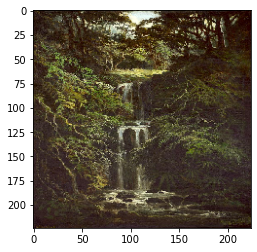

-----------------------------------------------------------------------
most similar products:


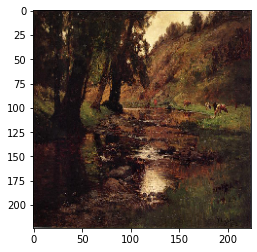

similarity score :  0.7160254


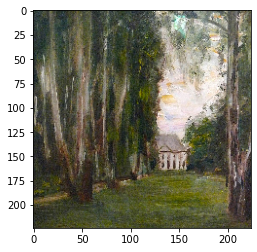

similarity score :  0.6998275


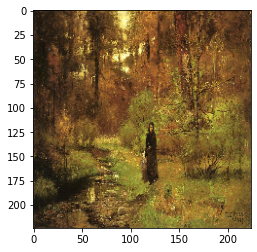

similarity score :  0.682916


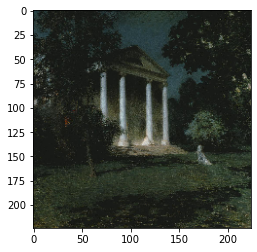

similarity score :  0.68140274


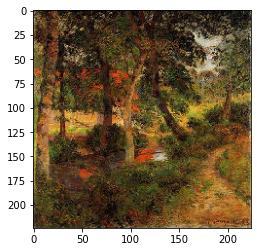

similarity score :  0.67341155


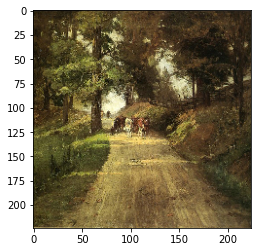

similarity score :  0.6701254


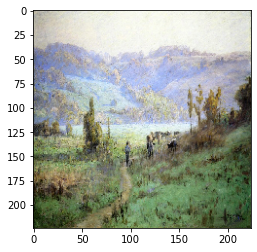

similarity score :  0.6644605


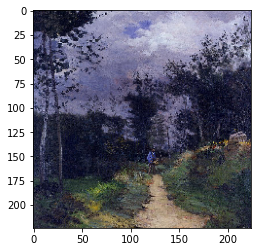

similarity score :  0.6625658


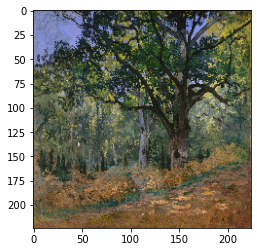

similarity score :  0.65795445


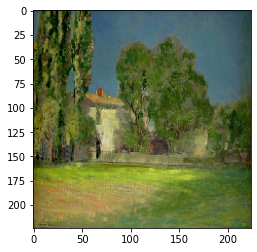

similarity score :  0.6565834


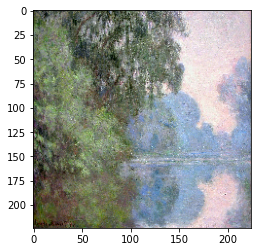

similarity score :  0.65646994


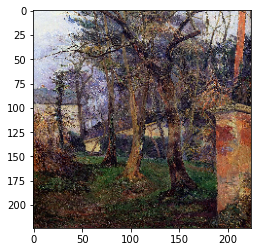

similarity score :  0.654892


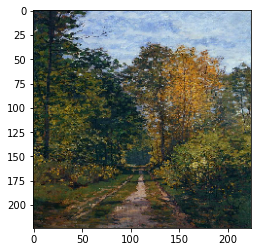

similarity score :  0.6528818


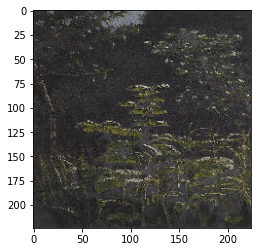

similarity score :  0.65236616


In [102]:
retrieve_most_similar_products(files[0])